# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# If failed to import, run: pip install -r requirements.txt

2025-11-29 18:55:11.292559: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-29 18:55:11.299594: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-29 18:55:12.177431: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-29 18:55:16.578972: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

# Data Extraction

Read from **heart_train.csv** into a pandas data frame(call it df)

In [2]:
df = pd.read_csv('heart_train.csv')

# Data Visualization

Try viewing the first five rows of your data (Note. try the head function)

In [3]:
df.head()

,PatientId,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,34,M,ATA,150,214,0,ST,168,N,0.0,Up,0
1,1,59,M,ASY,178,0,1,LVH,120,Y,0.0,Flat,1
2,2,58,M,ASY,115,0,1,Normal,138,N,0.5,Up,1
3,3,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up,1
4,4,52,M,ASY,165,0,1,Normal,122,Y,1.0,Up,1


Let's visualize our data bit and see number of people that have heart disease vs those who dont. In this particular dataset more people have heart disease than those who don't.

<Axes: >

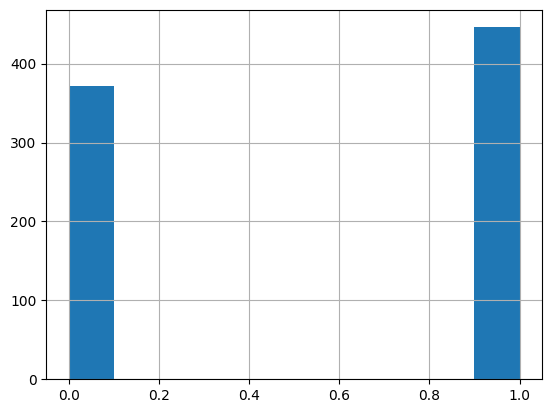

In [4]:
df['HeartDisease'].hist()

## Data Cleaning/PreProcessing

Before we contiune let us do some preprocessing on our data. Preprocessing is the process a data scientist or ML engineer goes through to make sure the data is clean and ready for the model. One example is checking to see if there are any null values in any of the columns and replacing them.

In [5]:
df.isnull().values.any()

np.False_

## Feature Engineering

Now Time to do some feature engineering. Extract values from columns you can use as features(hint try to use numerical columns). Store it an variable called X. Note do not use PatientId and remember to use .values to convert it to numpy array.

In [6]:
# List of categorical columns to convert
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Apply One-Hot Encoding using pd.get_dummies
# This converts columns like 'Sex' (M/F) into 'Sex_F' and 'Sex_M' (0s and 1s)
df_clean = pd.get_dummies(df, columns=categorical_cols)

# Display the new columns to verify
print("New columns after encoding:")
print(df_clean.columns)

New columns after encoding:
Index(['PatientId', 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [7]:
# Extract features into variable X
# We drop 'PatientId' (not a feature) and 'HeartDisease' (the target label)
# .values converts the Pandas DataFrame into a NumPy array, which is required for training
X = df_clean.drop(['PatientId', 'HeartDisease'], axis=1).values

Extract your labels in a variable called y (HeartDisease column). Do the same as above.

In [8]:
# Extract the target variable into y
y = df_clean['HeartDisease'].values

# Verify the shapes to ensure extraction was successful
print(f"\nShape of X: {X.shape}") # Should be (rows, number_of_features)
print(f"Shape of y: {y.shape}") # Should be (rows,)


Shape of X: (818, 20)
Shape of y: (818,)


# Data Normalization

We are going to now normalize our data. This will scale our data which will make it easier to train our model and make it more likley for our model to converge on the correct solution. Use the StandardScaler from sklearn to achieve this. Scale only the X variable. Store the result back into X.

In [9]:
sc = StandardScaler()

# Normalize X
# fit_transform calculates the mean and std dev for each feature, 
# then subtracts the mean and divides by the std dev. // mean 0, std 1
X = sc.fit_transform(X)


In [10]:
# Verify the result (Optional)
# The values should now be small, typically between -2 and 2.
print("First 5 rows of normalized X:")
print(X[:5])

First 5 rows of normalized X:
[[-2.05634489  0.93656992  0.1484195  -0.54627163  1.20647129 -0.82314391
  -0.52169123  0.52169123 -1.07097228  2.05999751 -0.54060992 -0.22674629
  -0.51029464 -1.22849601  2.05187502  0.8181612  -0.8181612  -0.27368128
  -0.99755799  1.14772839]
 [ 0.57834297  2.43560538 -1.83184956  1.83059111 -0.6690093  -0.82314391
  -0.52169123  0.52169123  0.93373098 -0.48543748 -0.54060992 -0.22674629
   1.95965219 -1.22849601 -0.48735912 -1.22225302  1.22225302 -0.27368128
   1.00244798 -0.87128628]
 [ 0.47295546 -0.93722441 -1.83184956  1.83059111  0.03429592 -0.35483697
  -0.52169123  0.52169123  0.93373098 -0.48543748 -0.54060992 -0.22674629
  -0.51029464  0.81400346 -0.48735912  0.8181612  -0.8181612  -0.27368128
  -0.99755799  1.14772839]
 [ 0.68373049 -0.1341697   0.50930965 -0.54627163  0.26873099  0.48811552
  -0.52169123  0.52169123  0.93373098 -0.48543748 -0.54060992 -0.22674629
  -0.51029464  0.81400346 -0.48735912 -1.22225302  1.22225302 -0.27368128
 

# Train/Test Split

We are now going to split our data between train and test. It is important to do this because we want to reduce the chance of overfitting so we dont want to test on the same data we just trained on. We will use the **train_test_split** function to achieve this. This has already been imported for you. Store the result in variables *X_train, y_train, X_test, y_test*. Use a *80/20* split.

In [11]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data goes to testing, 80% to training
# random_state=42 ensures the split is reproducible (same split every time you run it)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let us view the shape of the train data. The first number represents how many rows, the second represents how many columns or features.

In [12]:
X_train.shape

(654, 20)

Let us do the same for the test data.

In [13]:
X_test.shape

(164, 20)

## Logistic Regression

Let us create a model and fit the model to the train dataset.Let us use the LogisticRegression model from sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Create the Logistic Regression model
# max_iter=1000 is often needed to ensure the solver converges on the solution
clf = LogisticRegression(random_state=42, max_iter=1000)

Call the fit function for the classifier on *X_train* and *y_train*.

In [79]:
# 2. Fit the model to the training data
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,56
,solver,'lbfgs'
,max_iter,3000
,multi_class,'deprecated'


We are now going to test our model. Call the score function on the classifier and pass in X_test, and y_test. The score you get represents the accuracy of the model e.g| a score of 0.9 means the model is 90% accurate.

In [80]:
# 3. Test the results and report accuracy
# The .score() method predicts on X_test and compares to y_test automatically
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


# Neural Network

Now let's try the same with a neural network. We will create a small neural network with some hidden layers and an output layer. (Note you are free to design this yourself). The network should output one value (try using sigmoid activation for last layer).

In [111]:
# 1. Create the Neural Network
from tensorflow.keras.layers import Dropout # Import Dropout

model = Sequential()

# Takes 20 things in, outputs 1 thing

model.add(Dense(units=24, activation='gelu', input_dim=X_train.shape[1], ))
model.add(Dropout(0.5))  # Add Dropout layer with 50% dropout rate
model.add(Dense(units=12, activation='gelu'))
model.add(Dense(8, activation='gelu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

/home/orville/dev/comp3220-assignment2/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
# weight_decay=0.004 is a good starting point for small data
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.001, 
    weight_decay=0.004
)

# 3. The Loss (Label Smoothing)
# label_smoothing=0.05 prevents the model from being "overconfident"
loss = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05)
    
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Train the model, call the fit function and pass in X_train and y_train.

In [116]:
from tensorflow.keras.callbacks import EarlyStopping

# 3. Fit the model to the training data
# Stop if validation loss doesn't improve for 5 epochs
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, callbacks=[callback]) 

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8945 - loss: 0.3147
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8853 - loss: 0.3237
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9021 - loss: 0.3129
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8991 - loss: 0.3174
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9037 - loss: 0.3068
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9113 - loss: 0.3093
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9006 - loss: 0.3128
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8991 - loss: 0.3157
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8930 - loss: 0.3211
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8976 - loss: 0.3164
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8914 - loss: 0.3142
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

Let us now test the model. Call the evaluate function and pass in X_test and y_test.

In [115]:
# 4. Test the results
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8780 - loss: 0.4357 
Neural Network Accuracy: 0.88


## Test

You are now going to test your model on the hold out test set. There is a file called **heart_test.csv**. You will notice that this file does not have a HeartDisease column. You will have to use your model to make predicitions on the test data. You will then create a file called submission.csv which you will upload to kaggle to see your results.

Read heart_test.csv into a data frame called test_df

In [105]:
test_df = pd.read_csv('heart_test.csv')

Let us view the first five rows.

In [106]:
test_df.head()

,PatientId,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,818,36,M,NAP,112,340,0,Normal,184,N,1.0,Flat
1,819,63,M,ASY,170,177,0,Normal,84,Y,2.5,Down
2,820,58,M,ASY,114,318,0,ST,140,N,4.4,Down
3,821,64,M,ASY,144,0,0,ST,122,Y,1.0,Flat
4,822,46,M,ASY,118,186,0,Normal,124,N,0.0,Flat


Lets us now extract the same features as we did aboove to test on. You can call it X_new.

In [86]:
test_df_clean = pd.get_dummies(test_df, columns=categorical_cols)

X_new = test_df_clean.drop(['PatientId'], axis=1).values

We now need to normalize the test data as well. Use the scaler that you created above called sc and call the transform function and pass in X_new. Store the result back into X_new.

In [87]:
X_new = sc.transform(X_new)  # Use transform, not fit_transform

Call the predict function on X_new to get the predicitons.

In [107]:
predictions_tensor = model.predict(X_new)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


The neural network will output probabilties. We must convert those probabilites to 1 or 0. A probability greater than or equal to 0.5 is seen as a 1.Uncomment and run the cell below if the model you chose as your final model is a neural net created using tensorflow.

In [108]:
predictions = [1 if p >= 0.5 else 0 for p in predictions_tensor.squeeze()]

# Submission
Create a data frame with two columns PatientId and HeartDiesase (Try the pd.DataFrame function). The PatientId column should have the same values as the PatientId column from the test_df dataframe from above and HeartDisease column should be the predicitions you just created. Create a csv file from this data frame (Try using the .to_csv funtion, however make sure to remove indexes so set to the index flag to false). This should created a csv file, this is what you submit to kaggle.

In [109]:
# Create the Submission DataFrame
submission_df = pd.DataFrame({
    'PatientId': test_df['PatientId'],
    'HeartDisease': predictions
})
# Save to CSV
# index=False removes the row numbers, which Kaggle doesn't want
submission_df.to_csv('submission.csv', index=False)

# Theoretical Improvement
Compares the newly-created submission to all the submission in the old folder 
Submissions are stored as "submission_{accuracy}.csv"

In [110]:
# Read all csv files in the ./old directory
import os

# get the current submission file 
current_submission = 'submission.csv'

old_files = [f for f in os.listdir('./old') if f.endswith('.csv')]
avg_accuracy = 0
for file in old_files:
    # get the accuracy from each file name
    accuracy = int(file.split('_')[1].replace('.csv', ''))

    # Comapre the current submission with the old one
    old_submission = pd.read_csv(os.path.join('./old', file))
    submission_df = pd.read_csv(current_submission)
    comparison = submission_df.merge(old_submission, on='PatientId', suffixes=('_current', '_old'))

    differences = comparison[comparison['HeartDisease_current'] != comparison['HeartDisease_old']]

    # Determine percentage of differences
    percent_different = (len(differences) / len(comparison)) * 100 if len(comparison) > 0 else 0

    theorteical_accuracy = accuracy + percent_different
    
    if theorteical_accuracy > 100:
        print(f"⚠️ {accuracy:.2f}% -> {theorteical_accuracy:.2f}% exceeds 100%")
    elif theorteical_accuracy > accuracy:
        print(f"✅ {accuracy:.2f}% -> {theorteical_accuracy:.2f}%")
    else:
        print(f"❌ {accuracy:.2f}% -> {theorteical_accuracy:.2f}%")
    avg_accuracy += theorteical_accuracy

avg_accuracy /= len(old_files)
print(f"Average theoretical accuracy: {avg_accuracy:.2f}%")

✅ 89.00% -> 92.00%
✅ 88.00% -> 94.00%
✅ 87.00% -> 94.00%
✅ 88.00% -> 90.00%
✅ 87.00% -> 94.00%
✅ 92.00% -> 96.00%
✅ 91.00% -> 96.00%
⚠️ 100.00% -> 102.00% exceeds 100%
✅ 90.00% -> 98.00%
✅ 84.00% -> 89.00%
✅ 88.00% -> 90.00%
✅ 91.00% -> 96.00%
✅ 94.00% -> 100.00%
Average theoretical accuracy: 94.69%
